In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime
import prophet
import sklearn
from colorama import Fore
import panel as pn
pn.extension('tabulator')

In [2]:
dataset = pd.read_csv('katalog_gempa.csv', delimiter = ',')

In [3]:
dataset

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92882,2023/01/26,02:25:09.288,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
92883,2023/01/26,02:15:03.893,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN
92884,2023/01/26,01:57:08.885,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN
92885,2023/01/26,01:46:21.009,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
f = lambda x: f'{x[0]} {x[1]}'
dataset['datetime'] = pd.to_datetime(dataset[['tgl', 'ot']].apply(f, axis=1))
dataset.drop(columns=['tgl', 'ot'], inplace=True)
dataset

,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,datetime
0,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 21:02:43.058
1,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 20:58:50.248
2,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 17:43:12.941
3,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 16:24:14.755
4,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-01 16:20:37.327
...,...,...,...,...,...,...,...,...,...,...,...,...
92882,3.24,127.18,10,4.0,Talaud Islands - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 02:25:09.288
92883,2.70,127.10,10,3.9,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 02:15:03.893
92884,-7.83,121.07,10,3.8,Flores Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 01:57:08.885
92885,3.00,127.16,10,4.1,Northern Molucca Sea,NaN,NaN,NaN,NaN,NaN,NaN,2023-01-26 01:46:21.009


dataset.to_csv('dataset.csv', index=False)

In [5]:
dataset.remark.value_counts()

Minahassa Peninsula - Sulawesi        9433
Sulawesi - Indonesia                  7897
Sumbawa Region - Indonesia            7312
Java - Indonesia                      6798
Northern Sumatra - Indonesia          5941
Southern Sumatra - Indonesia          5314
Banda Sea                             5003
Northern Molucca Sea                  4984
Seram - Indonesia                     4325
Halmahera - Indonesia                 3628
Irian Jaya Region - Indonesia         3137
South of Java - Indonesia             2503
Talaud Islands - Indonesia            2427
Flores Region - Indonesia             2338
Timor Region                          1947
Flores Sea                            1879
Near North Coast of Irian Jaya        1865
Sumba Region - Indonesia              1851
Irian Jaya - Indonesia                1666
Ceram Sea                             1535
Bali Region - Indonesia               1374
Southern Molucca Sea                  1271
Sunda Strait - Indonesia              1063
Off West Co

In [6]:
dataset.dtypes

lat                float64
lon                float64
depth                int64
mag                float64
remark              object
strike1            float64
dip1               float64
rake1              float64
strike2            float64
dip2               float64
rake2              float64
datetime    datetime64[ns]
dtype: object

In [7]:
sulawesi = dataset[dataset['remark']=='Minahassa Peninsula - Sulawesi']
sulawesi.head()

,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2,datetime
25,1.60,123.58,111,4.1,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-02 06:06:45.283
40,0.27,120.60,37,4.4,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-03 08:17:07.958
60,1.11,121.11,20,3.9,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-06 16:14:34.453
91,-0.88,123.68,39,3.7,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-09 09:37:51.330
98,0.27,124.63,261,3.4,Minahassa Peninsula - Sulawesi,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-10 12:49:03.705


sulawesi.to_csv('sulawesi.csv', index=False)

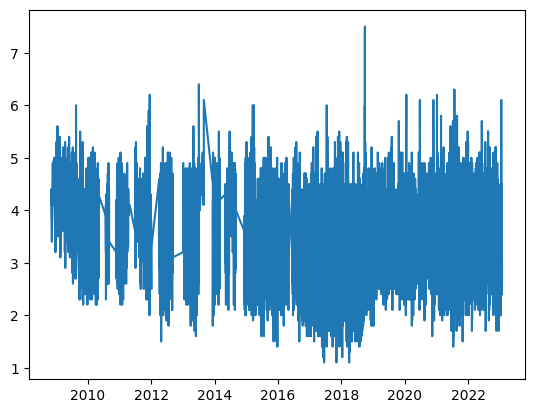

In [8]:
sulawesigraf = plt.plot(sulawesi['datetime'], sulawesi['mag'])

In [9]:
print(sulawesi[sulawesi['mag'] == sulawesi['mag'].max()])

        lat     lon  depth  mag                          remark  strike1  \
45620 -0.22  119.85     10  7.5  Minahassa Peninsula - Sulawesi    351.2   
45621 -0.22  119.85     10  7.5  Minahassa Peninsula - Sulawesi      NaN   

       dip1  rake1  strike2  dip2  rake2                datetime  
45620  59.7  -10.7    86.64  80.8 -149.2 2018-09-28 10:02:43.674  
45621   NaN    NaN      NaN   NaN    NaN 2018-09-28 10:02:43.674  


In [10]:
data = sulawesi[['datetime','mag']]
data.dropna(inplace=True)
data.columns = ['ds','y']
data.tail()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9024\1810961671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,ds,y
92859,2023-01-26 08:08:57.552,2.6
92861,2023-01-26 07:49:51.209,3.0
92869,2023-01-26 05:00:06.899,2.5
92874,2023-01-26 04:14:53.346,2.7
92877,2023-01-26 03:10:22.966,2.4


data.to_csv('data.csv', index=False)

In [11]:
len(data)

9433

In [12]:
train, test = np.split(data, [int(.80 *len(data))])

In [13]:
len(train)

7546

In [14]:
len(test)

1887

In [15]:
train.to_csv('train_fbprophet.csv', index=False)

In [16]:
test.to_csv('test_fbprophet.csv', index=False)

## FBprophet

In [15]:
from prophet import Prophet

m = Prophet()
model = m.fit(data)

07:08:37 - cmdstanpy - INFO - Chain [1] start processing
07:08:46 - cmdstanpy - INFO - Chain [1] done processing


In [16]:
future = model.make_future_dataframe(periods=365, freq='D') 
forecast = model.predict(future) 

foreset = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
foreset

,ds,yhat,yhat_lower,yhat_upper
0,2008-11-02 06:06:45.283,4.051583,3.049235,4.941814
1,2008-11-03 08:17:07.958,4.122810,3.139529,5.058537
2,2008-11-06 16:14:34.453,3.854037,2.858110,4.872107
3,2008-11-09 09:37:51.330,4.063716,3.007736,5.014872
4,2008-11-10 10:48:08.327,4.092436,3.155655,5.148571
...,...,...,...,...
9654,2024-01-22 23:58:35.638,3.279075,2.282497,4.274023
9655,2024-01-23 23:58:35.638,3.322498,2.286689,4.280956
9656,2024-01-24 23:58:35.638,3.304682,2.348790,4.232223
9657,2024-01-25 23:58:35.638,3.276704,2.346998,4.218080


In [17]:
foreset.to_csv('foresetNew2.csv', index=False)

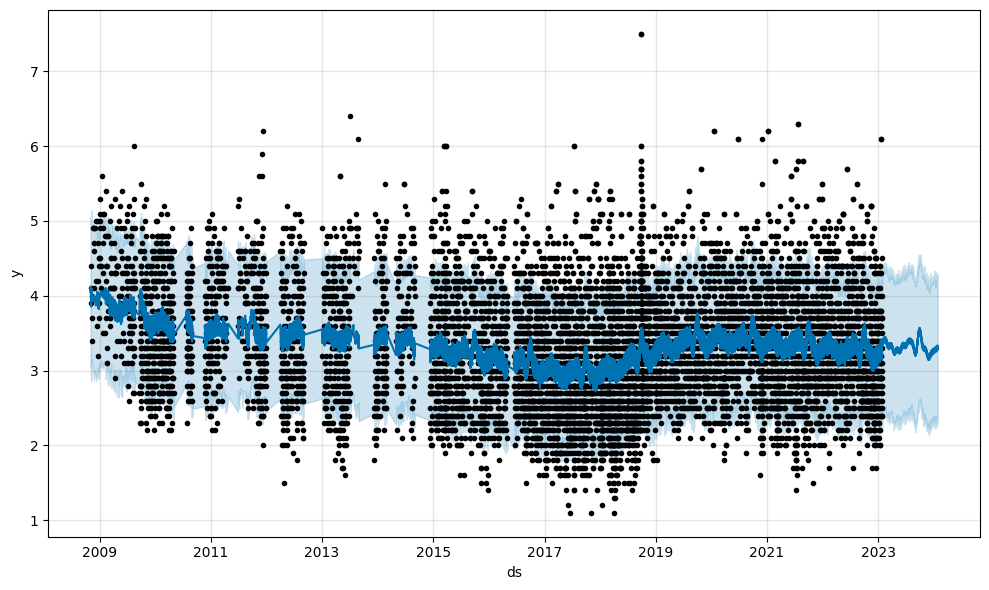

In [18]:
plot1 = model.plot(forecast, uncertainty=True)

In [19]:
plot1.savefig('prophet1new2.png')

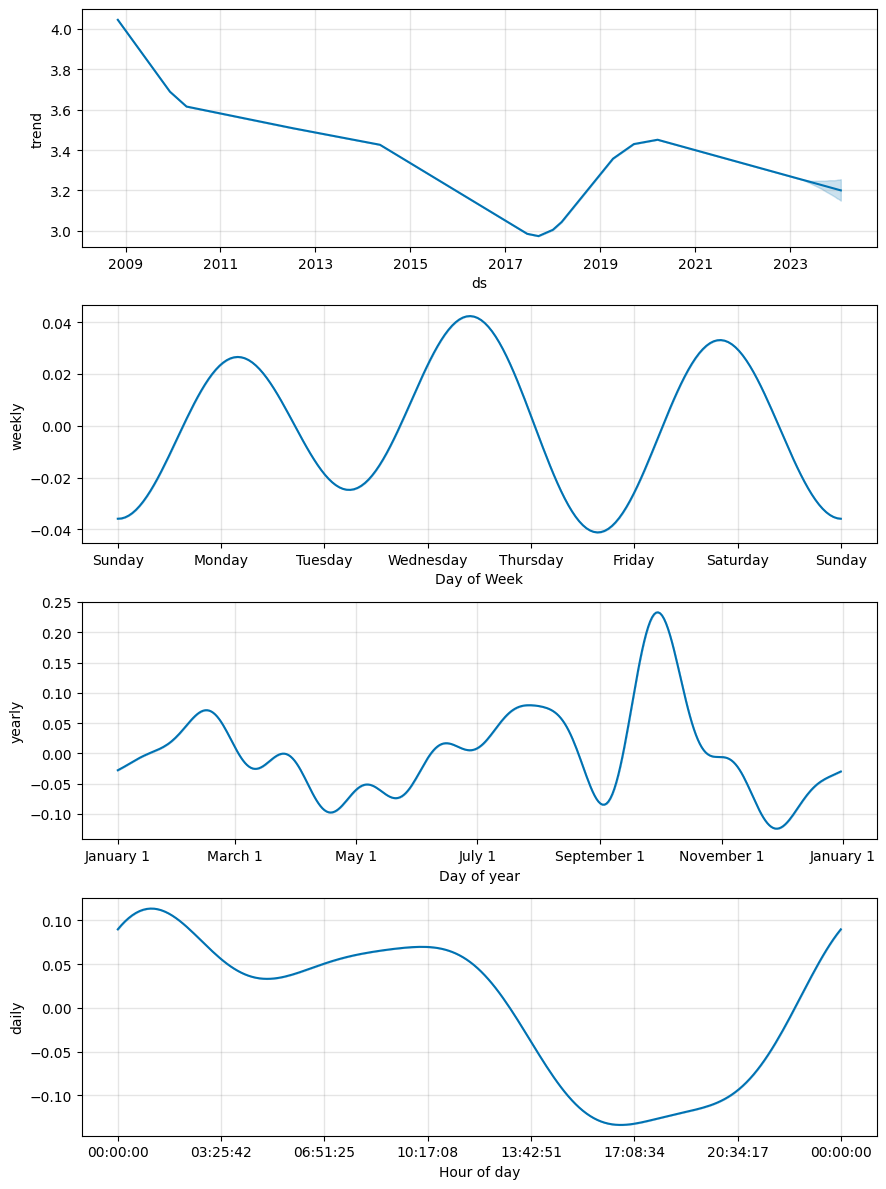

In [17]:
plot2 = model.plot_components(forecast)

In [21]:
plot2.savefig('prophet2new2.png')

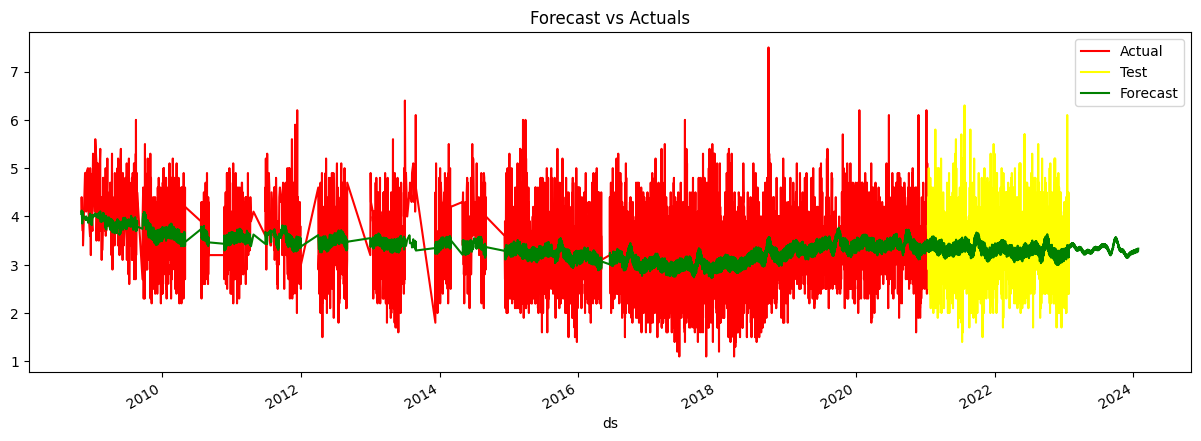

In [19]:
def grafikprophet(): 
    f, ax = plt.subplots(figsize=(14,5))
    f.set_figheight(5)
    f.set_figwidth(15)
    train.plot(kind='line',x='ds', y='y', color='red', label='Actual', ax=ax)
    test.plot(kind='line',x='ds', y='y', color='yellow', label='Test', ax=ax)
    forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
    plt.title('Forecast vs Actuals')
    plt.show()
    
    
grafprophet = grafikprophet()

In [20]:
from sklearn.metrics import mean_squared_error , mean_absolute_error
import math

In [21]:
predictions = forecast.iloc[7545:9432]['yhat']

In [22]:
predictions

7545    3.327292
7546    3.466322
7547    3.445488
7548    3.267666
7549    3.386283
          ...   
9427    3.366944
9428    3.304455
9429    3.366307
9430    3.325772
9431    3.368841
Name: yhat, Length: 1887, dtype: float64

In [23]:
score_rmse = np.sqrt(mean_squared_error(predictions,test['y']))
score_mae = mean_absolute_error(predictions,test['y'])
print(Fore.GREEN + 'Root Mean Squared Error between actual and predicted values:',score_rmse)
print("Mean Absolute Error between actual and predicted values: ",score_mae)

fbprophetrmse = score_rmse
fbpropetmae = score_mae

Root Mean Squared Error between actual and predicted values: 0.7564790615653441
Mean Absolute Error between actual and predicted values:  0.5901861428621041


## LSTM

In [24]:
df = sulawesi[['datetime','mag']]
df.dropna(inplace=True)
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9024\1140423153.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,datetime,mag
25,2008-11-02 06:06:45.283,4.1
40,2008-11-03 08:17:07.958,4.4
60,2008-11-06 16:14:34.453,3.9
91,2008-11-09 09:37:51.330,3.7
98,2008-11-10 12:49:03.705,3.4


In [25]:
df.set_index('datetime', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9433 entries, 2008-11-02 06:06:45.283000 to 2023-01-26 03:10:22.966000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mag     9433 non-null   float64
dtypes: float64(1)
memory usage: 147.4 KB


In [26]:
df

,mag
datetime,
2008-11-02 06:06:45.283,4.1
2008-11-03 08:17:07.958,4.4
2008-11-06 16:14:34.453,3.9
2008-11-09 09:37:51.330,3.7
2008-11-10 12:49:03.705,3.4
...,...
2023-01-26 08:08:57.552,2.6
2023-01-26 07:49:51.209,3.0
2023-01-26 05:00:06.899,2.5


df.to_csv('df.csv', index=True)

In [27]:
len(df)

9433

In [28]:
#dt = df.filter(['mag'])
datset = df.values
training_data_len = int(np.ceil( len(datset) * .80 ))

training_data_len

7547

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(datset)

scaled_data

array([[0.46875 ],
       [0.515625],
       [0.4375  ],
       ...,
       [0.21875 ],
       [0.25    ],
       [0.203125]])

In [30]:
train_data = scaled_data[0:int(training_data_len), :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.46875 , 0.515625, 0.4375  , 0.40625 , 0.359375, 0.453125,
       0.59375 , 0.546875, 0.59375 , 0.5625  , 0.46875 , 0.59375 ,
       0.609375, 0.484375, 0.390625, 0.609375, 0.5625  , 0.484375,
       0.328125, 0.53125 , 0.4375  , 0.53125 , 0.515625, 0.40625 ,
       0.609375, 0.53125 , 0.59375 , 0.65625 , 0.625   , 0.515625,
       0.515625, 0.46875 , 0.703125, 0.375   , 0.625   , 0.5625  ,
       0.5     , 0.59375 , 0.625   , 0.375   , 0.578125, 0.484375,
       0.578125, 0.671875, 0.40625 , 0.515625, 0.3125  , 0.34375 ,
       0.515625, 0.578125, 0.4375  , 0.421875, 0.453125, 0.578125,
       0.4375  , 0.40625 , 0.46875 , 0.609375, 0.390625, 0.4375  ])]
[0.40625]

[array([0.46875 , 0.515625, 0.4375  , 0.40625 , 0.359375, 0.453125,
       0.59375 , 0.546875, 0.59375 , 0.5625  , 0.46875 , 0.59375 ,
       0.609375, 0.484375, 0.390625, 0.609375, 0.5625  , 0.484375,
       0.328125, 0.53125 , 0.4375  , 0.53125 , 0.515625, 0.40625 ,
       0.609375, 0.53125 , 0.59375 , 0.65625 , 

In [31]:
x_train.shape

(7487, 60, 1)

In [32]:
from keras.models import Sequential 
from keras.layers import Dense, LSTM

In [33]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [34]:
# Train the model
history = model.fit(x_train, y_train, batch_size=72, epochs=30)

Epoch 1/30
104/104 [==============================] - 30s 180ms/step - loss: 0.0155
Epoch 2/30
104/104 [==============================] - 19s 182ms/step - loss: 0.0139
Epoch 3/30
104/104 [==============================] - 19s 186ms/step - loss: 0.0137
Epoch 4/30
104/104 [==============================] - 19s 187ms/step - loss: 0.0136
Epoch 5/30
104/104 [==============================] - 19s 183ms/step - loss: 0.0136
Epoch 6/30
104/104 [==============================] - 19s 182ms/step - loss: 0.0136
Epoch 7/30
104/104 [==============================] - 19s 182ms/step - loss: 0.0136
Epoch 8/30
104/104 [==============================] - 19s 183ms/step - loss: 0.0135
Epoch 9/30
104/104 [==============================] - 19s 184ms/step - loss: 0.0135
Epoch 10/30
104/104 [==============================] - 19s 182ms/step - loss: 0.0135
Epoch 11/30
104/104 [==============================] - 19s 181ms/step - loss: 0.0133
Epoch 12/30
104/104 [==============================] - 20s 189ms/step - lo

model.save('keras_model.h5')

from keras.models import load_model

loaded_model = load_model('keras_model.h5')

loaded_model.summary()

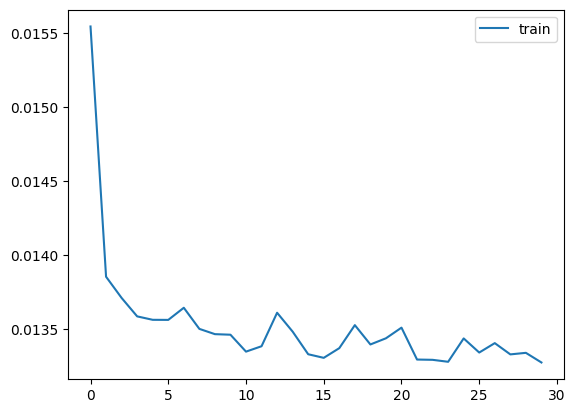

In [35]:
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [36]:
test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = datset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [37]:
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

59/59 [==============================] - 4s 43ms/step


In [39]:
train = df[:training_data_len]
valid = df[training_data_len:]
valid['Predictions'] = predictions

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9024\3983594056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


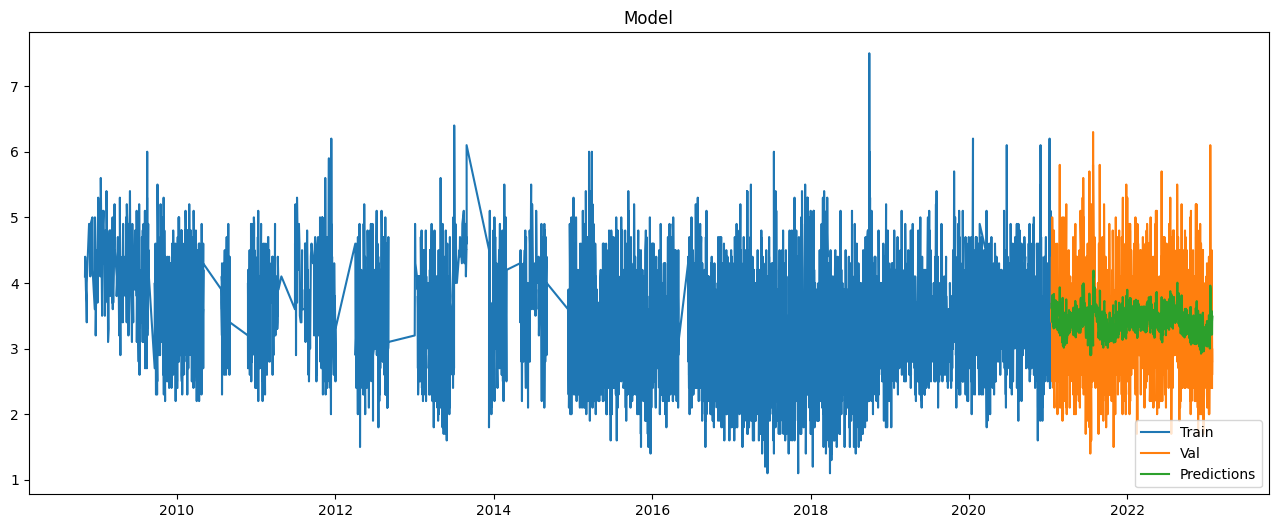

In [40]:
def grafiklstm1(): 
    plt.figure(figsize=(16,6))
    plt.title('Model')
    plt.plot(train['mag'])
    plt.plot(valid[['mag', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    
graflstm1 = grafiklstm1()

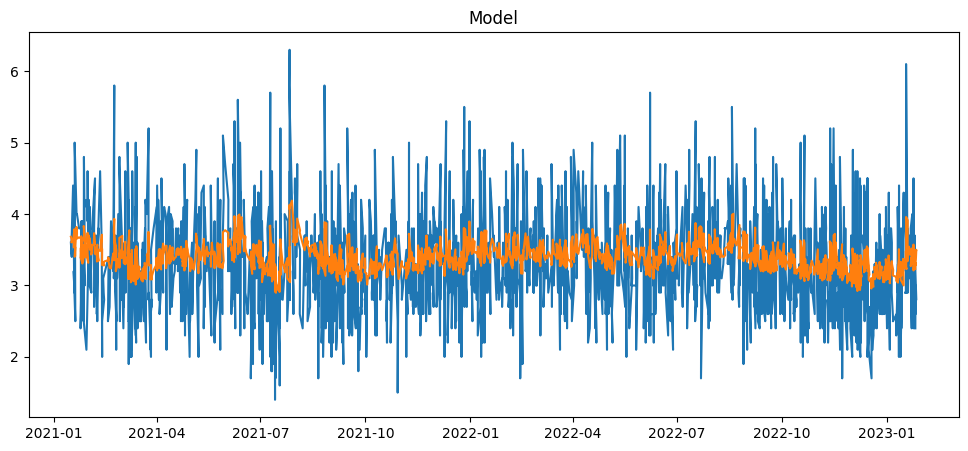

In [41]:
 def grafiklstm2(): 
    plt.figure(figsize=(12,5))
    plt.title('Model')
    plt.plot(valid[['mag', 'Predictions']])
    plt.show()
    
graflstm2 = grafiklstm2()

In [42]:
valid

,mag,Predictions
datetime,,
2021-01-15 17:46:36.651,3.6,3.682840
2021-01-16 12:15:21.837,3.4,3.644691
2021-01-16 02:56:21.523,3.5,3.603642
2021-01-17 16:10:11.369,4.4,3.610958
2021-01-18 18:51:22.480,2.9,3.787664
...,...,...
2023-01-26 08:08:57.552,2.6,3.332306
2023-01-26 07:49:51.209,3.0,3.281666
2023-01-26 05:00:06.899,2.5,3.318666


In [43]:
valid.to_csv('validNew.csv', index=True)

In [44]:
predictionsscore_rmse = np.sqrt(mean_squared_error(valid['Predictions'],y_test ))
predictionsscore_mae = mean_absolute_error(valid['Predictions'],y_test )
print(Fore.GREEN + 'Root Mean Squared Error between actual and predicted values:',(predictionsscore_rmse))
print("Mean Absolute Error between actual and predicted values: ",predictionsscore_mae)

lstmrmse = predictionsscore_rmse
lstmmae = predictionsscore_mae

Root Mean Squared Error between actual and predicted values: 0.7346873976245671
Mean Absolute Error between actual and predicted values:  0.5857056443537028


## DashBoard

In [45]:
import hvplot.pandas
import holoviews as hv

hv.extension('bokeh')

In [46]:
datasetpanel = dataset.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
datasetpanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=        lat   ...)

In [47]:
sulawesipanel = sulawesi.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
sulawesipanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=        lat   ...)

In [48]:
sulawesigraf_plot = sulawesi.hvplot(x='datetime', 
                                    y='mag', 
                                    title='Chart Earthquake Sulawesi')
sulawesigraf_plot

:Curve   [datetime]   (mag)

In [49]:
datapanel = data.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
datapanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=              ...)

In [50]:
forecastpanel = foreset.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
forecastpanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=              ...)

def mpl_to_holoviews(mpl_fig):
    renderer = hv.Store.renderers['matplotlib'].instance(fig=mpl_fig, holomap='auto')
    return renderer.get_plot()

hv_plot1 = mpl_to_holoviews(plot1)

plot2_plot = plot2.hvplot()
plot2_plot

test_plot =     test.hvplot(kind='line',
                                    x='ds', 
                                    y='y', 
                                    color='yellow', 
                                    label='test',)

train_plot =     train.hvplot(kind='line',
                                    x='ds', 
                                    y='y', 
                                    color='red', 
                                    label='train',
                                    title='Forecast vs Actuals',)

forecast_plot =     forecast.hvplot(kind='line',
                                        x='ds',
                                        y='yhat', 
                                        color='green',
                                        label='Forecast',)

data_plot = train_plot * test_plot                                  
data_vs_forecast_plot = data_plot * forecast_plot
data_vs_forecast_plot

In [51]:
fbprophet_output = pn.pane.Str(
    f"Root Mean Squared Error between actual and predicted values: {score_rmse}\n"
    f"Mean Absolute Error between actual and predicted values: {score_mae}"
)
fbprophet_output

Str(str)

In [52]:
dfpanel = df.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
dfpanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=              ...)

train_plot =     train.hvplot(kind='line',
                              label='Train',
                              title='Forecast vs Actuals')
valid_plot =     valid.hvplot(kind='line')

                                    
data_vs_lstm_plot = train_plot * valid_plot
data_vs_lstm_plot

In [53]:
validpanel = valid.pipe(pn.widgets.Tabulator, pagination='remote', page_size = 10, sizing_mode='stretch_width') 
validpanel

Tabulator(page_size=10, pagination='remote', sizing_mode='stretch_width', value=              ...)

In [54]:
lstm_plot  = valid.hvplot(kind='line',
                          x = 'datetime',
                          y = ['mag','Predictions'],
                          autorange="y")

lstm_plot

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

In [55]:
lstm_output = pn.pane.Str(
    f"Root Mean Squared Error between actual and predicted values: {predictionsscore_rmse}\n"
    f"Mean Absolute Error between actual and predicted values: {predictionsscore_mae}"
)
lstm_output

Str(str)

In [57]:
#Layout using Template
template = pn.template.FastListTemplate(
    title='Earthquake Forecast Time Series', 
    main=[pn.pane.Markdown("## Dataset Gempa Sulawesi"), 
             pn.panel(sulawesipanel),
             pn.panel(sulawesigraf_plot),
             pn.pane.Markdown("## Facebook Prophet"),
             pn.panel(datapanel),
             pn.panel(forecastpanel),
             pn.panel('prophet1new2.png', width=700),
             pn.panel('prophet2new2.png', width=700),
             pn.panel('ForecastvsActualsFBPROPET.png', width=700),
             pn.pane.Markdown("## Evaluation Metrics"),
             fbprophet_output,
             pn.pane.Markdown("## LSTM"),
             pn.panel(dfpanel),
             pn.panel('graflstm1new.png', width=700),
             pn.panel('graflstm2new.png', width=700),
             pn.panel(validpanel),
             ##pn.panel(data_vs_lstm_plot),
             pn.pane.Markdown("## Evaluation Metrics"),
             lstm_output,
         ],
        accent_base_color="#88d8b0",
        header_background="#88d8b0",
)
template.show()
template.servable();

Launching server at http://localhost:51510
